In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


## Data Import

In [80]:
communes = pd.read_excel("commune.xlsx")

quests = pd.read_csv("quest.csv")

enrolls = pd.read_csv("enroll.csv")

ords = pd.read_csv("ord.csv")

transactions = pd.read_csv("transaction.csv")

study_domains = pd.read_csv("study_domain.csv")

technologies = pd.read_csv("technology.csv")

industries = pd.read_csv("industry.csv")


## Data Processing

### quests DataFrame

In [81]:
# Unique value in quests verifying
print("dimensions: ",quests.shape,"\n")
print(quests.columns.values)
print(quests.quest_id.nunique())

dimensions:  (250, 17) 

['Unnamed: 0' 'gender' 'dob' 'commune' 'created_at' 'modified_at'
 'department' 'education_level' 'university' 'study_domain'
 'current_employed' 'formal_sector_job' 'have_computer_home'
 'internet_at_home' 'hear_AA_1' 'after_AA' 'quest_id']
250


In [82]:
# Variables selected

quests.drop(["Unnamed: 0","modified_at"], inplace = True, axis = 1)
quests.head()

,gender,dob,commune,created_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,male,17/05/1996,ht0111,2021-02-16T16:56:30.579504Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601
3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601


### Communes DataFrame

In [83]:
communes.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


In [84]:
# merge communes DataFrame with quests DataFrame

communes["Commune_Id"] = communes["Commune_Id"].str.lower()

questsD = pd.merge(quests, communes[["Commune_Id", "Commune_en", "Departement"]],
        left_on="commune", right_on="Commune_Id", how="left")

# Variables selected
questsD.drop(["Commune_Id", "department"], inplace = True, axis=1)

### Enrolls DataFrame

In [85]:
enrolls.head()

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


In [86]:
# Unique value in quests verifying
print(enrolls.shape, enrolls["quest_id"].isna().sum(), enrolls["quest_id"].nunique())
print(enrolls.columns)

print("course", enrolls["course_id"].nunique())

(148, 15) 46 102
Index(['Unnamed: 0', 'created_at', 'expiry_date', 'user_id', 'course_name',
       'course_id', 'percentage_completed', 'completed_at', 'expired',
       'is_free_trial', 'completed', 'started_at', 'activated_at',
       'updated_at', 'quest_id'],
      dtype='object')
course 1


In [87]:
# Variables selected
enrollsD = enrolls[["created_at", "percentage_completed", "completed_at", "completed", "started_at", "quest_id"]]

#rename series in other to avoid conflicts
enrollsD = enrollsD.rename(columns={"created_at": "on_platform", "completed_at": "course_completed_at", "completed": "course_completed", "started_at": "course_started_at"})

# In other to track enrolled candidates after merge
enrollsD["enrolled"] = True
enrollsD.head()


,on_platform,percentage_completed,course_completed_at,course_completed,course_started_at,quest_id,enrolled
0,2020-12-12T06:41:29.844Z,0.0,NaN,False,NaN,NaN,True
1,2020-12-13T14:41:17.720Z,0.0,NaN,False,NaN,NaN,True
2,2020-12-15T00:53:06.499Z,0.0,NaN,False,NaN,NaN,True
3,2020-12-18T18:38:55.683Z,0.0,NaN,False,NaN,NaN,True
4,2020-12-21T14:45:06.528Z,0.0,NaN,False,NaN,NaN,True


### ords and transactions DataFrame


In [88]:
# concatenation of ords and transactions

ords.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636,0,0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601


In [89]:
len(ords[ords["status"] != "Complete"])

0

In [90]:
transactions.head()

,Unnamed: 0,created_at,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160
2,2,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,1047613,4645070622
3,3,2021-03-08T19:06:32.837Z,2021-03-08T19:06:32.837Z,41177453,1047613,4645208830
4,4,2021-03-08T22:10:00.796Z,2021-03-08T22:10:00.796Z,40797121,1047613,4646815401


In [91]:
paid = pd.concat([ords, transactions])
print(paid.shape, ords.shape, transactions.shape)

(78, 16) (18, 13) (60, 6)


In [92]:
paid.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id,modified_at,course_id,transaction_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601,NaN,NaN,NaN
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601,NaN,NaN,NaN
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601,NaN,NaN,NaN
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636.0,0.0,0.0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601,NaN,NaN,NaN
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601,NaN,NaN,NaN


In [93]:
paids = paid["quest_id"]
paids["paid"] = True

<ipython-input-93-49ba41e6be83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paids["paid"] = True


In [94]:
questsD2 = pd.merge(questsD, paids, left_on="quest_id", right_on="quest_id", how="left")
questsD3 = pd.merge(questsD2, enrollsD, left_on="quest_id", right_on="quest_id", how="left")

### study_Domains DataFrame

In [95]:
#get dummies
study_domains.head()

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item1,Computer Science,905e4cf5-ce95-11eb-96a9-7c67a234f601
2,2,item6,Management,905e4cf5-ce95-11eb-96a9-7c67a234f601
3,3,other,other,905e73fd-ce95-11eb-a7b0-7c67a234f601
4,4,other,other,905e9b27-ce95-11eb-9c37-7c67a234f601


In [96]:
# study_domains list for plot 
study_domains_list = list(study_domains["values"].unique())

# Get dummies
study_domainsD = pd.get_dummies(data = study_domains.iloc[:,2:], columns=["values"], prefix="", prefix_sep="")
study_domainsD.head()


,quest_id,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
1,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,0,0,0,0
2,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,0,0,0,0,1,0,0,0
3,905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
4,905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1


### technologies DataFrame

In [97]:
technologies.head()

,Unnamed: 0,key,values,quest_id
0,0,item1,R,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item11,Excel,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,item2,Python,905e2608-ce95-11eb-809f-7c67a234f601
3,3,item3,Java,905e2608-ce95-11eb-809f-7c67a234f601
4,4,item4,JavaScript,905e2608-ce95-11eb-809f-7c67a234f601


In [98]:
# make technologies list for plot
technologies_list = list(technologies["values"].unique())

#get dummies
technologiesD = pd.get_dummies(data = technologies.iloc[:,2:], columns=["values"], prefix="", prefix_sep="")
technologiesD.head()

,quest_id,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1,0,0,0
1,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,0,0,0,0
2,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,0,0,0,1,0,0,0,0
3,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,1,0,0,0,0,0,0,0,0
4,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,1,0,0,0,0,0,0,0


### Industry DataFrame

In [99]:
# indutry list for plot
w = industries["values"].unique()
industries_list = []
for _ in w:
    industries_list.append(_.strip())


#get dummies

industriesD = pd.get_dummies(data = industries.iloc[:,2:], columns=["values"], prefix="", prefix_sep="")
technologiesD.head()

,quest_id,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1,0,0,0
1,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,0,0,0,0
2,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,0,0,0,1,0,0,0,0
3,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,1,0,0,0,0,0,0,0,0
4,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,1,0,0,0,0,0,0,0


### Final dataset

In [100]:
full_DF0 = questsD3
full_DF0.head()

,gender,dob,commune,created_at,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,...,after_AA,quest_id,Commune_en,Departement,on_platform,percentage_completed,course_completed_at,course_completed,course_started_at,enrolled
0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,unknown,unknown,[],unknown,unknown,unknown,...,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Port-au-Prince,West,2021-02-14T23:15:19.500Z,0.000000,NaN,False,2021-02-17T08:43:53.457Z,True
1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,Bachelors (bacc +4),other,['other'],No,unknown,Yes,...,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN
2,male,17/05/1996,ht0111,2021-02-16T16:56:30.579504Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,...,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,2021-02-20T21:20:37.450Z,0.325581,NaN,False,2021-02-20T21:20:37.814Z,True
3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,...,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN
4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,High School (16 years),unknown,['other'],No,unknown,Yes,...,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
technologiesD.head()

,quest_id,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1,0,0,0
1,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,0,0,0,0
2,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,0,0,0,1,0,0,0,0
3,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,1,0,0,0,0,0,0,0,0
4,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
study_domainsD.head()

,quest_id,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
1,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,0,0,0,0
2,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,0,0,0,0,1,0,0,0
3,905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
4,905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1


In [103]:
industriesD.head()

,quest_id,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other
0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,905e2608-ce95-11eb-809f-7c67a234f601,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,905e2608-ce95-11eb-809f-7c67a234f601,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Data Cleanning

In [104]:
#taking dates

# a date with an invalid format is returned as error
full_DF0["dob"].replace({"3 aout 1977" : "03/08/1977"}, inplace=True)

def takeDate(x):
    x = x.str[:10]
    return pd.to_datetime(x)

dates = ["course_started_at", "created_at", "on_platform", "dob"]

for _ in dates:
    full_DF0[_] = takeDate(full_DF0[_])

#full_DF0["created_at"] = full_DF0["created_at"].str[:10]
full_DF0.head()

,gender,dob,commune,created_at,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,...,after_AA,quest_id,Commune_en,Departement,on_platform,percentage_completed,course_completed_at,course_completed,course_started_at,enrolled
0,male,1998-08-25,ht0111,2021-02-14,unknown,unknown,[],unknown,unknown,unknown,...,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Port-au-Prince,West,2021-02-14,0.000000,NaN,False,2021-02-17,True
1,female,1996-09-29,ht0111,2021-02-16,Bachelors (bacc +4),other,['other'],No,unknown,Yes,...,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,NaT,NaN,NaN,NaN,NaT,NaN
2,male,1996-05-17,ht0111,2021-02-16,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,...,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,2021-02-20,0.325581,NaN,False,2021-02-20,True
3,male,1996-11-24,ht0111,2021-02-16,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,...,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,NaT,NaN,NaN,NaN,NaT,NaN
4,male,1997-07-20,ht0111,2021-02-16,High School (16 years),unknown,['other'],No,unknown,Yes,...,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,West,NaT,NaN,NaN,NaN,NaT,NaN


In [105]:
# Age created

full_DF0["Age"] = (full_DF0["created_at"]-full_DF0["dob"])//365
full_DF0["Age"] = full_DF0["Age"].apply(lambda x: str(x)[:2])

## Data Visualization

In [106]:
full_DF0.columns

Index(['gender', 'dob', 'commune', 'created_at', 'education_level',
       'university', 'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id', 'Commune_en', 'Departement', 'on_platform',
       'percentage_completed', 'course_completed_at', 'course_completed',
       'course_started_at', 'enrolled', 'Age'],
      dtype='object')

### Its objective is to know which three communes of the country will be the most likely to expand its training centers.
#### Knowing that each cohort must have 30 students
Suivant les hypotheses selon lesquelles, AyitiAnalitics n'a pas de contraintes budgetaires (pour acceuillir les participants selectionnes) quant a l'accompagnement.
The first step is to regarder les inscriptions par communes pour trouver les 3 communes presentants le plus grand nombre d'interesses.

In [107]:
# top regions by number of applicants

top_app = full_DF0.Commune_en.value_counts()
top_app = top_app.head(5)

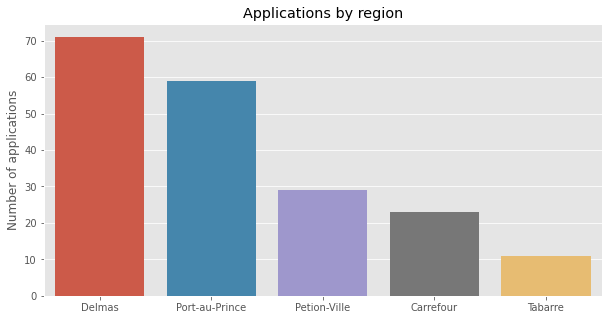

In [108]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(10,5))
sns.barplot(x=top_app.index, y=top_app)
plt.title("Applications by region", )
plt.ylabel("Number of applications")

plt.show()

As we can see it, the 3 regions to consider (who have most interested people in the Data Science Bootcamp) are Delmas, Petion-Ville and Port-au-Prince

### How many applications must be made to select 25% women for each on average

Here, we'll try to considere each region separately in order to answer this question.
We'll also need the percentage of woman who applied in the program.

In [109]:
#the selected regions
regions_selected = list(top_app.head(3).index)

# We store the size of the population

delmas_DF = full_DF0[full_DF0["Commune_en"] == "Delmas"]
pv_DF = full_DF0[full_DF0["Commune_en"] == "Petion-Ville"]
pap_DF = full_DF0[full_DF0["Commune_en"] == "Port-au-Prince"]

selected_DF = pd.concat([delmas_DF, pv_DF, pap_DF])
#The percentage of wives in each region considered

n1 = len(delmas_DF)
n3 = len(pv_DF)
n2 = len(pap_DF)

prop_Delmas = len(delmas_DF[delmas_DF["gender"] == "female"])/n1

prop_PaP = len(pap_DF[pap_DF["gender"] == "female"])/n2

prop_PV = len(pv_DF[pv_DF["gender"] == "female"])/n3

femmes_prop = [prop_Delmas, prop_PaP, prop_PV]

femmes_prop = [(round(el, 4)*100) for el in femmes_prop]

for _ in range(3):
    print("The proportion of women in ", regions_selected[_]," percent is ",femmes_prop[_]," percent")

The proportion of women in  Delmas  percent is  16.900000000000002  percent
The proportion of women in  Port-au-Prince  percent is  32.2  percent
The proportion of women in  Petion-Ville  percent is  13.79  percent


Thus, we don't have any data on the selectioned participants We keep the assumtion that the probability for a candidate to be selectioned is not correlate with the fact to be a man or a women. We can explain it like that: if 25% of applications comes from women, 25% of the selectioned candidates will be woman. They are normally distributed.

In this case, we dont need to analyse for Port-au-Prince, we need 30 applications, if 30 applications is submitted for Port-au-Prince, we'll probably have more than 25% of women needed. Let's analyse for Petion-Ville and Delmas.

If we really need 25% of woman, we have to use the percentage of man (75%)

In [110]:
# proportion * n = 8

n_Del = round(8/prop_Delmas)
n_Pv = round(8/prop_PV)

n_Pap = round((30-8)/(1-prop_PaP))


print("""The number of submission necesary for Petion-Ville is {} \n
        , for Delmas {} \n and for Port-au-Prince it's {}""".format(n_Pv, n_Del, n_Pap))

The number of submission necesary for Petion-Ville is 58 

        , for Delmas 47 
 and for Port-au-Prince it's 32


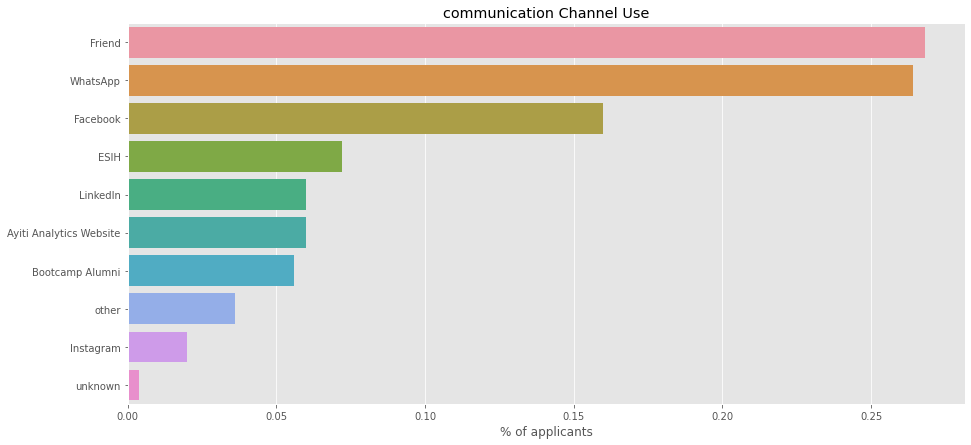

In [111]:
n = len(full_DF0)

channels = full_DF0.hear_AA_1.value_counts()/n


#plt.style.use("ggplot")
fig = plt.figure(figsize=(15,7))
sns.barplot(y=channels.index, x=channels)
plt.title("communication Channel Use")
plt.xlabel(f"% of applicants")

plt.show()

In [112]:
top_channels = channels.head()
top_channels

Friend      0.268
WhatsApp    0.264
Facebook    0.160
ESIH        0.072
LinkedIn    0.060
Name: hear_AA_1, dtype: float64

We can notice that the "word of mouth" and Whatsapp combined give almost the half of applicants number.
Adding to Facebook, we have 70 %.

Let's see if we consider the 3 communes selectionned on the first answer


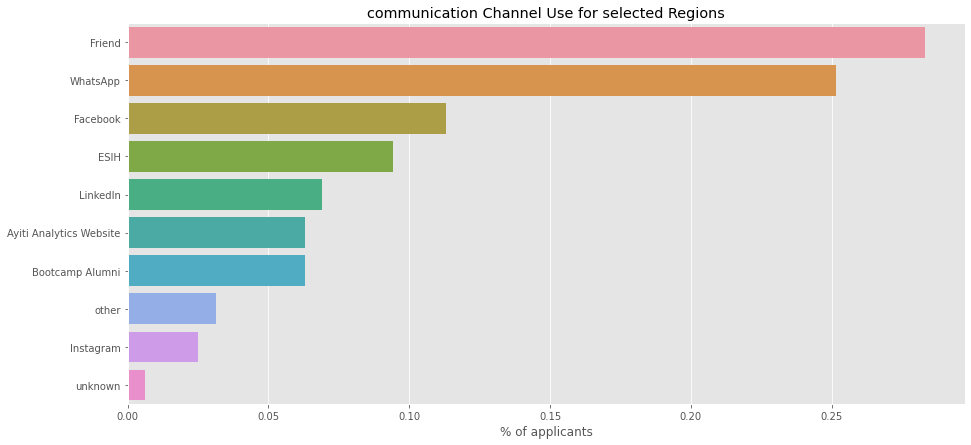

In [113]:
n2 = len(selected_DF)
channels2 = selected_DF.hear_AA_1.value_counts()/n2

fig = plt.figure(figsize=(15,7))

# add a subplot with no frame
sns.barplot(y=channels2.index, x=channels2)
plt.title("communication Channel Use for selected Regions")
plt.xlabel(f"% of applicants")

plt.show()

In [114]:
The distribution of the proportions are sensibly equals

SyntaxError: invalid syntax (<ipython-input-114-02b0fd485b79>, line 1)

In [216]:
full_DF0.education_level.value_counts()

Bachelors (bacc +4)        148
Other                       51
High School (16 years)      33
Masters                     14
unknown                      3
Doctorate (PhD, MD, JD)      1
Name: education_level, dtype: int64

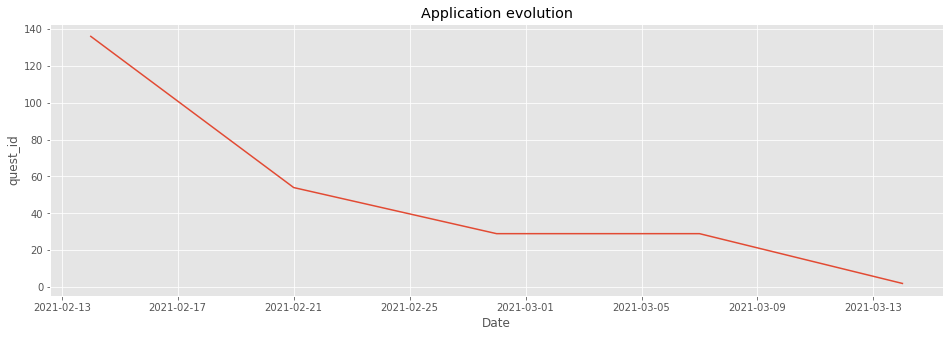

In [236]:

tsInsc = full_DF0[["quest_id", "created_at"]].groupby(pd.Grouper(key = "created_at", freq="7D")).count()
fig = plt.figure(figsize=(16,5))
sns.lineplot(x=tsInsc.index, y=tsInsc['quest_id'])
plt.title("Application evolution")
plt.xlabel(f"Date")

plt.show()

According to this graphe, we can see it will be not important to add 

We are going to realize a test to see if there are a relationship between the fact to be a woman and the communication channe used to become acquainted with the Bootcamp Program.

In [50]:

pvt = pd.pivot_table(data=full_DF0[["gender","hear_AA_1", "quest_id"]], index="gender", columns="hear_AA_1", aggfunc="count", dropna=True, values="quest_id")
pvt



hear_AA_1,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
gender,,,,,,,,,,
female,4.0,8.0,5.0,6.0,11.0,1.0,1.0,9.0,2.0,NaN
male,11.0,6.0,13.0,34.0,56.0,4.0,14.0,57.0,7.0,1.0


In [54]:
#Test du khi-2
from scipy.stats import chi2_contingency

# In other to make the analysis, we choose the values >=5, that are important for us
pvtKhi2 = pvt[["Bootcamp Alumni", "ESIH", "Facebook", "Friend", "WhatsApp"]]


chi2, pval, dof, expected = chi2_contingency(pvtKhi2)
print(pvtKhi2)
print(pval)

hear_AA_1  Bootcamp Alumni  ESIH  Facebook  Friend  WhatsApp
gender                                                      
female                 8.0   5.0       6.0    11.0       9.0
male                   6.0  13.0      34.0    56.0      57.0
0.0029398147724266676


we reject the null hypothesis which assumes that the variables "Communication channels" and "gender" are independent (99% level of confidence).
Let's show a barplot

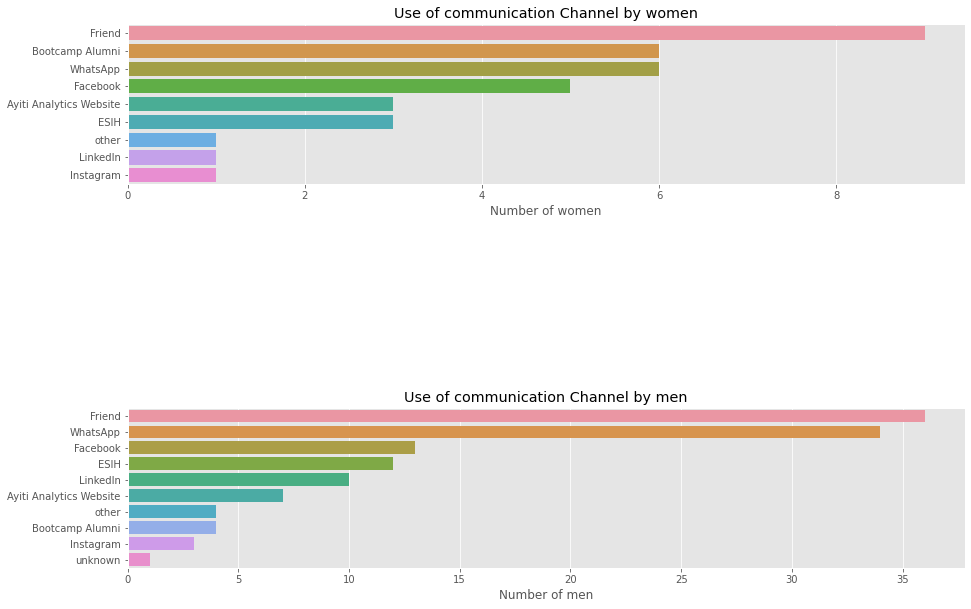

In [78]:
channels2 = selected_DF[["gender", "hear_AA_1"]]
channels2W= (channels2[channels2["gender"] == "female"]).hear_AA_1.value_counts()

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(311)
sns.barplot(y=channels2W.index, x=channels2W)
plt.title("Use of communication Channel by women")
plt.xlabel(f"Number of women")
channels2M= (channels2[channels2["gender"] == "male"]).hear_AA_1.value_counts()

ax2 = plt.subplot(313)
sns.barplot(y=channels2M.index, x=channels2M)
plt.title("Use of communication Channel by men")
plt.xlabel(f"Number of men")

plt.show()

in fact, for girls, the second channel through which they became aware of the program is the contact of a member of the first cohort, contrary to the general trend.
Let's see the distribution for men.
For men bootcamp alumni is't significant, 8th place.